### Program code for L2-ARCTIC data augmentation

Oct 9, 2023

In [1]:
import glob
import os
import random
import shutil
random.seed(10)
input_folder = r"T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset"

In [10]:
"""
Check if all the folders have the same files that are manually annotated
and the same files that are not manually annotated
If this is true, it is easier to split
"""
# check if all manual annotation filenames are the same
folders = []
paths = glob.glob(os.path.join(input_folder, "*"))
for path in paths:
    if os.path.isdir(path):
        folders.append(path)
        # print("folder:", path)
        
sample_folder = folders[0]
print("Sample folder: ", sample_folder)
sample_manual_annotations = glob.glob(os.path.join(sample_folder, "annotation", "*.TextGrid"))
sample_manual_annotations = [path.split("\\")[-1][:-9] for path in sample_manual_annotations]
existing_manual_annotation_filenames = set(sample_manual_annotations)
for folder in folders[1:]:
    print("Comparison folder: ", folder)
    manual_annotations = glob.glob(os.path.join(folder, "annotation", "*.TextGrid"))
    manual_annotations = [path.split("\\")[-1][:-9]  for path in manual_annotations]
    unique_manual_annotation_filenames = set(manual_annotations)
    print(f"\nIn {folder} but not in {sample_folder}")
    print(unique_manual_annotation_filenames.difference(existing_manual_annotation_filenames))
    print(f"\nIn {sample_folder} but not in {folder}")
    print(existing_manual_annotation_filenames.difference(unique_manual_annotation_filenames))
    assert existing_manual_annotation_filenames == unique_manual_annotation_filenames, "There are different files annotated for different speakers"

print("Manual annotation filenames are all the same!")


Sample folder:  T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\BWC
Comparison folder:  T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\HJK

In T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\HJK but not in T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\BWC
{'arctic_a0145', 'arctic_a0233', 'arctic_b0425', 'arctic_a0144', 'arctic_b0022', 'arctic_b0106', 'arctic_b0386', 'arctic_a0369', 'arctic_a0475', 'arctic_a0495', 'arctic_b0266', 'arctic_b0315', 'arctic_b0192', 'arctic_b0503', 'arctic_b0530', 'arctic_a0345', 'arctic_a0258', 'arctic_a0168', 'arctic_a0148', 'arctic_b0225', 'arctic_a0271', 'arctic_a0378', 'arctic_b0238', 'arctic_b0047', 'arctic_b0019', 'arctic_a0303', 'arctic_b0320', 'arctic_a0384', 'arctic_b0355', 'arctic_a0416', 'arctic_b0342', 'arctic_b0143', 'arctic_a0379', 'arctic_b0304', 'arctic_a0542', 'arctic_a0365', 'arctic_a0209', 'arctic_a0442', 'arctic_a0178', 'arctic_

AssertionError: There are different files annotated for different speakers

In [12]:
"""
Note that the total number of files per folder can differ because some speakers
did not speak some audios / due to recording issues so audio was omitted

Obtain filenames in test and filenames in train for each folder to save
to a dictionary with key being folder path and value being {"test": [...], "train":[...]}
"""

input_folder = r"T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset"
folder_to_filename_dict = {}

for folder in glob.glob(os.path.join(input_folder, "*")):
    print(folder)
    output_folder = folder.replace("l2 artic dataset", "l2 artic dataset split")

    # splits file with manual annotations first
    manual_annotations = glob.glob(os.path.join(folder, "annotation", "*.TextGrid"))
    print(f"Total number of files with manual annotations: {len(manual_annotations)}")
    manual_annotations = [path.split("\\")[-1][:-9] for path in manual_annotations]
    test_manual = random.sample(manual_annotations, k=round(len(manual_annotations) * 0.2))
    train_manual = [path for path in manual_annotations if path not in test_manual]
    print(f"{len(test_manual)} files with manual annotation in test and {len(train_manual)} in train")

    # split files without manual annotations
    wav = glob.glob(os.path.join(folder, "wav", "*.wav"))
    all_filenames = [file.split("\\")[-1][:-4] for file in wav]
    print(f"Total number of files: {len(all_filenames)}")
    files_without_manual_annotation = [file for file in all_filenames if file not in manual_annotations]
    print(f"Total number of files without manual annotations: {len(files_without_manual_annotation)}")
    test_without_manual = random.sample(files_without_manual_annotation, k=round(len(files_without_manual_annotation) * 0.2))
    train_without_manual = [path for path in files_without_manual_annotation if path not in test_without_manual]
    print(f"{len(test_without_manual)} files with no manual annotation in test and {len(train_without_manual)} in train")
    print()

    # combine to form test and train
    test = test_manual + test_without_manual
    train = train_manual + train_without_manual

    # sanity checks
    assert(len(test) + len(train) == len(all_filenames))
    has_overlap = set(test_manual) & set(train_manual)
    assert(not has_overlap)
    has_overlap = set(test_without_manual) & set(train_without_manual)
    assert(not has_overlap)
    has_overlap = set(test_manual) & set(test_without_manual)
    assert(not has_overlap)
    has_overlap = set(train_manual) & set(train_without_manual)
    assert(not has_overlap)
    has_overlap = set(test) & set(train)
    assert(not has_overlap)

    # save result
    folder_to_filename_dict[folder] = {"test":test, "train":train}

# print("folder_to_filename_dict:", folder_to_filename_dict)

T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\BWC
Total number of files with manual annotations: 150
30 files with manual annotation in test and 120 in train
Total number of files: 1130
Total number of files without manual annotations: 980
196 files with no manual annotation in test and 784 in train

T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\HJK
Total number of files with manual annotations: 150
30 files with manual annotation in test and 120 in train
Total number of files: 1131
Total number of files without manual annotations: 981
196 files with no manual annotation in test and 785 in train

T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\HKK
Total number of files with manual annotations: 150
30 files with manual annotation in test and 120 in train
Total number of files: 1131
Total number of files without manual annotations: 981
196 files with no manual annotation in test and 785 in train

T:\Tere

In [14]:
debug = False

"""
Copy the files into new folders based on their split
"""
folder_to_extension_mapping = {"wav": ".wav", "transcript":".txt", "textgrid":".TextGrid", "annotation":".TextGrid"}
for folder_path, split_details in folder_to_filename_dict.items():
    print(folder_path)
    test_filenames, train_filenames = split_details["test"], split_details["train"]
    train_split_folder_path = os.path.join(folder_path, "train").replace("l2 artic dataset", "l2 artic dataset split")
    for filename in train_filenames:
        for inner_folder, extension in folder_to_extension_mapping.items():
            # check if the file is present in src
            full_filename = filename+extension
            src = os.path.join(folder_path, inner_folder, full_filename)
            if os.path.exists(src):
                dest_folder = os.path.join(train_split_folder_path, inner_folder)
                dest = os.path.join(dest_folder, full_filename)
                if not os.path.exists(dest_folder):
                    os.makedirs(dest_folder)
                shutil.copyfile(src, dest)
    print("Train folder copying is complete")

    test_split_folder_path = os.path.join(folder_path, "test").replace("l2 artic dataset", "l2 artic dataset split")
    for filename in test_filenames:
        for inner_folder, extension in folder_to_extension_mapping.items():
            # check if the file is present in src
            full_filename = filename+extension
            src = os.path.join(folder_path, inner_folder, full_filename)
            if os.path.exists(src):
                dest_folder = os.path.join(test_split_folder_path, inner_folder)
                dest = os.path.join(dest_folder, full_filename)
                if not os.path.exists(dest_folder):
                    os.makedirs(dest_folder)
                shutil.copyfile(src, dest)
    print("Test folder copying is complete")

    # check that transcript, textgrid and annotations folder have same files
    for split_folder_path in [train_split_folder_path, test_split_folder_path]:
        transcript_files = glob.glob(os.path.join(split_folder_path, "transcript", "*.txt"))
        transcript_filenames = [path.split("\\")[-1][:-4] for path in transcript_files]
        textgrid_files = glob.glob(os.path.join(split_folder_path, "textgrid", "*.TextGrid"))
        textgrid_filenames = [path.split("\\")[-1][:-9] for path in textgrid_files]
        wav_files = glob.glob(os.path.join(split_folder_path, "wav", "*.wav"))
        wav_filenames = [path.split("\\")[-1][:-4] for path in wav_files]
        assert(len(transcript_filenames) == len(textgrid_filenames) == len(wav_filenames))
        assert(set(transcript_filenames) == set(textgrid_filenames) == set(wav_filenames))

    if debug:
        print("train_split_folder_path:", train_split_folder_path)
        print("test_split_folder_path:", test_split_folder_path)
        print("len(all_train_files):", len(all_train_files))
        print("len(train_filenames):", len(train_filenames))
    
    # check for any data loss
    all_train_files = [path.split("\\")[-1][:-4] for path in glob.glob(os.path.join(train_split_folder_path, "wav", "*.wav"))]
    # print(set(all_train_files).difference(set(train_filenames)))
    assert(set(all_train_files) == set(train_filenames))    
    all_test_files = [path.split("\\")[-1][:-4] for path in glob.glob(os.path.join(test_split_folder_path, "wav", "*.wav"))]
    assert(set(all_test_files) == set(test_filenames))

    # check the annations folder adds up to what is expected
    train_annotation_files = glob.glob(os.path.join(train_split_folder_path, "annotation", "*.TextGrid"))
    test_annotation_files = glob.glob(os.path.join(test_split_folder_path, "annotation", "*.TextGrid"))
    assert(len(train_annotation_files) == 120)
    assert(len(test_annotation_files) == 30)


T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\BWC
Train folder copying is complete
Test folder copying is complete
T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\HJK
Train folder copying is complete
Test folder copying is complete
T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\HKK
Train folder copying is complete
Test folder copying is complete
T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\HQTV
Train folder copying is complete
Test folder copying is complete
T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\LXC
Train folder copying is complete
Test folder copying is complete
T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\NCC
Train folder copying is complete
Test folder copying is complete
T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset\PNV
Train folder copying is complete
Test folder copying is 

---

### Program code for L2-ARCTIC data augmentation

Plan A:

https://pytorch.org/audio/stable/tutorials/audio_data_augmentation_tutorial.html


In [1]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !conda install ffmpeg
# !pip install soundfile
# !pip install matplotlib

In [2]:
import torch
import torchaudio
import torchaudio.functional as F

print(torch.__version__)
print(torchaudio.__version__)

# https://ffmpeg.org/ffmpeg-filters.html
# https://pytorch.org/audio/stable/tutorials/effector_tutorial.html
#
effects = (
    (0.8, 1.0, 1.25),  # audio tempo atempo=tempo
    (
        # "crystalizer",
        # "flanger",
        "highpass=frequency=1500",
    ),
    (
        "vibrato=f=5:d=0.4",
        "volume=1.5",
    ),
    (
        "aecho=0.8:0.88:30:0.3",
        "volume=1.5",
    ),
    # (
    #    "crystalizer",
    # ),
    # (
    #    "flanger",
    # ),
)

effect_labels = []

effectors = []
for i in range(len(effects[0])):
    for j in range(1, len(effects)):
        effect = f"atempo={effects[0][i]}," + ",".join(effects[j])
        print("effect:", effect)
        effectors.append(torchaudio.io.AudioEffector(effect=effect))
        effect_labels.append(effect)


2.1.0+cu118
2.1.0+cu118
effect: atempo=0.8,highpass=frequency=1500
effect: atempo=0.8,vibrato=f=5:d=0.4,volume=1.5
effect: atempo=0.8,aecho=0.8:0.88:30:0.3,volume=1.5
effect: atempo=1.0,highpass=frequency=1500
effect: atempo=1.0,vibrato=f=5:d=0.4,volume=1.5
effect: atempo=1.0,aecho=0.8:0.88:30:0.3,volume=1.5
effect: atempo=1.25,highpass=frequency=1500
effect: atempo=1.25,vibrato=f=5:d=0.4,volume=1.5
effect: atempo=1.25,aecho=0.8:0.88:30:0.3,volume=1.5


In [3]:
import matplotlib.pyplot as plt

def plot_waveform(waveform, sample_rate, effect):
    waveform = waveform.numpy()

    # num_channels, num_frames = waveform.shape
    num_frames, num_channels = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[:, c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    # figure.suptitle("waveform: " + effect)
    figure.suptitle(effect)


In [4]:
#
# Update annotation with the tempo ratio
#

import textgrid


def textgrid_save(input_path, output_path, tempo_ratio):
    """
    Adjust timings in a TextGrid according to a tempo change.

    :param input_path: Path to the input TextGrid.
    :param output_path: Path to save the adjusted TextGrid.
    :param tempo_ratio: Ratio of the new tempo to the original tempo.
                        > 1.0 for faster, < 1.0 for slower.
    """
    tg = textgrid.TextGrid()
    
    try:
        tg.read(input_path)
    except ValueError:
        print(f"{input_path}: ValueError: possibly error or inconsistency in time ranges, file skipped")
    except:
        print(f"{input_path}: error loading file, file skipped")
    
    for tier in tg:
        # Adjust timings of intervals or points in the tier
        for entry in tier:
            if isinstance(entry, textgrid.Interval):
                entry.minTime *= tempo_ratio
                entry.maxTime *= tempo_ratio
            elif isinstance(entry, textgrid.Point):
                entry.time *= tempo_ratio

        # Adjust xmin and xmax of the tier
        tier.minTime *= tempo_ratio
        tier.maxTime *= tempo_ratio

    # Adjust xmin and xmax of the whole TextGrid
    tg.minTime *= tempo_ratio
    tg.maxTime *= tempo_ratio

    tg.write(output_path)
    

The following cell will read train files wav, then generate n manipulated versions per defined effects.
Wave form will be visualized for the first sample for comparison.

### Parameters

- sample_count: number of audio files to be read, currently commented for full set inspection

BWC/arctic_a0001: waveform0.shape: torch.Size([199246, 1]), sample_rate: 44100
1-BWC/arctic_a0001: original


1-BWC/arctic_a0001i: atempo=0.8,highpass=frequency=1500


1-BWC/arctic_a0001j: atempo=0.8,vibrato=f=5:d=0.4,volume=1.5


1-BWC/arctic_a0001k: atempo=0.8,aecho=0.8:0.88:30:0.3,volume=1.5


1-BWC/arctic_a0001l: atempo=1.0,highpass=frequency=1500


1-BWC/arctic_a0001m: atempo=1.0,vibrato=f=5:d=0.4,volume=1.5


1-BWC/arctic_a0001n: atempo=1.0,aecho=0.8:0.88:30:0.3,volume=1.5


1-BWC/arctic_a0001o: atempo=1.25,highpass=frequency=1500


1-BWC/arctic_a0001p: atempo=1.25,vibrato=f=5:d=0.4,volume=1.5


1-BWC/arctic_a0001q: atempo=1.25,aecho=0.8:0.88:30:0.3,volume=1.5


BWC/arctic_a0002: waveform0.shape: torch.Size([245948, 1]), sample_rate: 44100
BWC/arctic_a0003: waveform0.shape: torch.Size([204415, 1]), sample_rate: 44100
BWC/arctic_a0004: waveform0.shape: torch.Size([154917, 1]), sample_rate: 44100
BWC/arctic_a0005: waveform0.shape: torch.Size([91474, 1]), sample_rate: 44100
BWC/arctic_a0006: waveform0.shape: torch.Size([223307, 1]), sample_rate: 44100
BWC/arctic_a0008: waveform0.shape: torch.Size([142661, 1]), sample_rate: 44100
BWC/arctic_a0009: waveform0.shape: torch.Size([223680, 1]), sample_rate: 44100
BWC/arctic_a0012: waveform0.shape: torch.Size([223027, 1]), sample_rate: 44100
BWC/arctic_a0014: waveform0.shape: torch.Size([188116, 1]), sample_rate: 44100
BWC/arctic_a0015: waveform0.shape: torch.Size([84130, 1]), sample_rate: 44100
BWC/arctic_a0016: waveform0.shape: torch.Size([272470, 1]), sample_rate: 44100
BWC/arctic_a0017: waveform0.shape: torch.Size([288702, 1]), sample_rate: 44100
BWC/arctic_a0018: waveform0.shape: torch.Size([77163, 

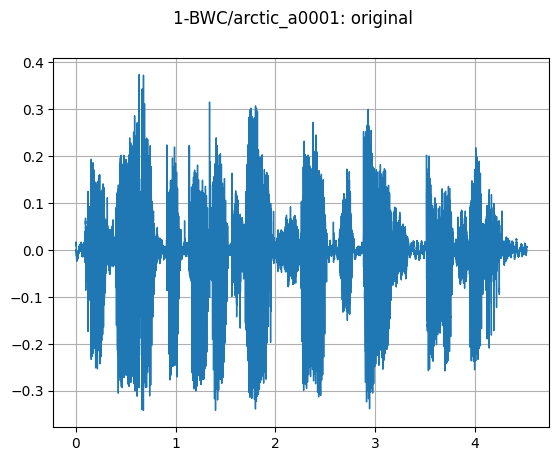

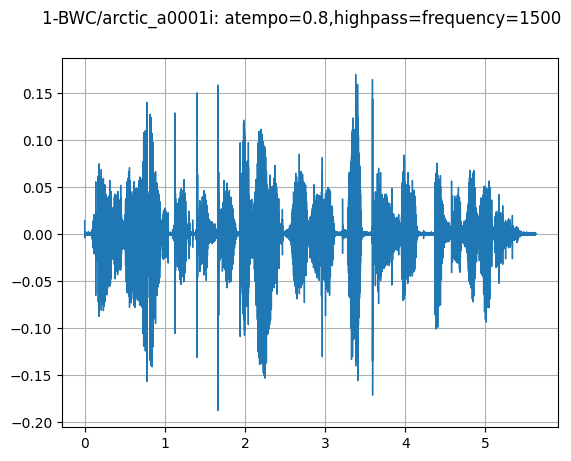

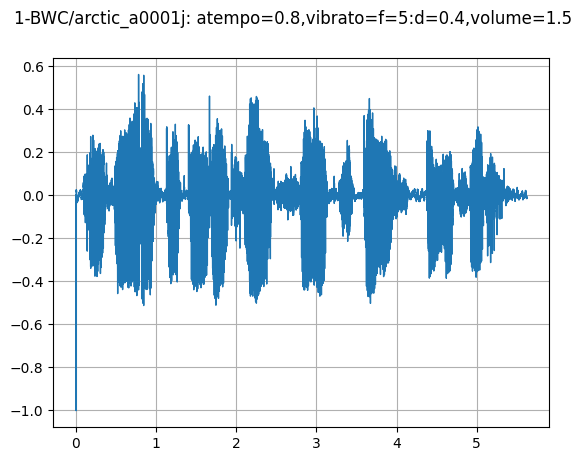

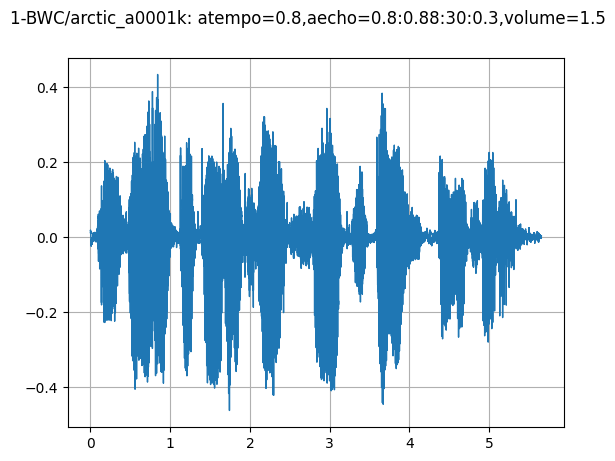

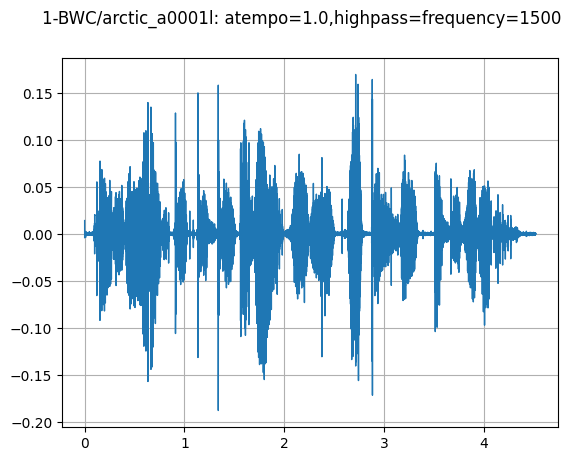

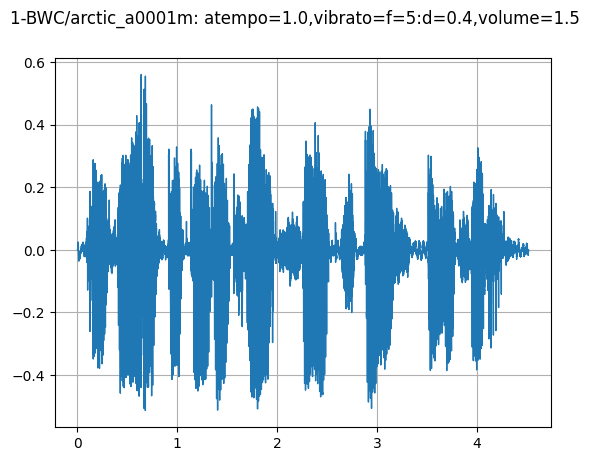

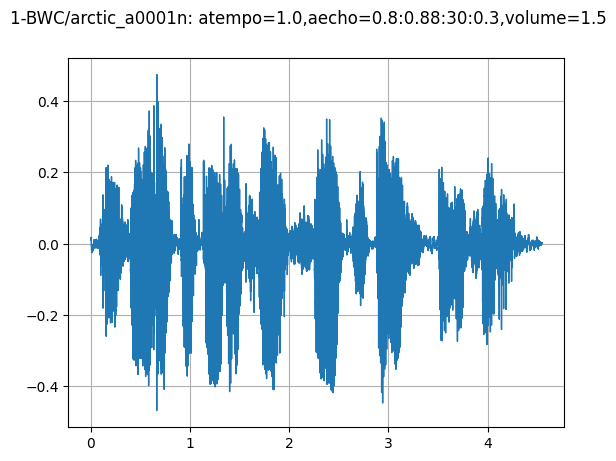

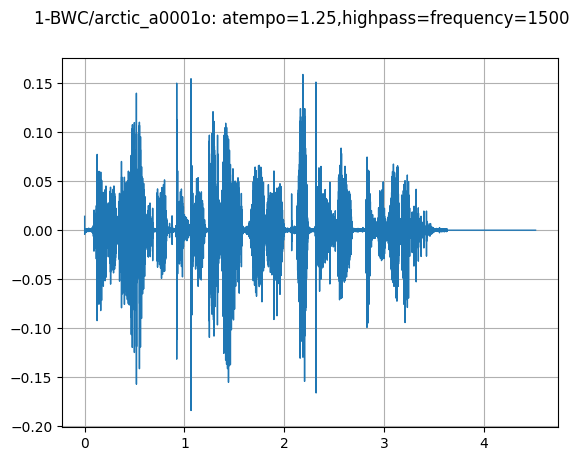

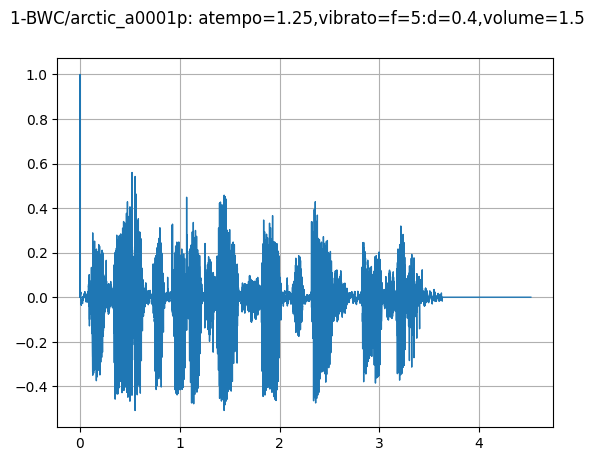

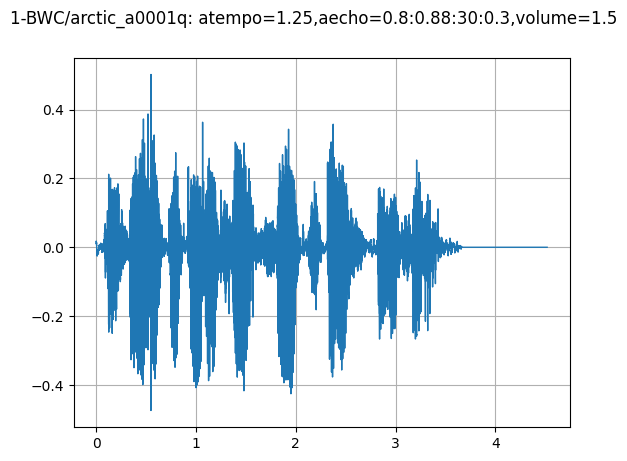

In [8]:
import glob
import os
import random
import shutil
import timeit
from IPython.display import display, Audio

t0 = timeit.default_timer()
ti = t0

random.seed(10)

verbose, debug = True, False

sample_count, sample_show, sample_limit = 0, random.randint(1, 9), 1e5  # sample counter, id-to-show and limit

skipped = []  # "wav"]  # any file generation should be skipped to save time: {"wav", "transcript", "textgrid", "annotation"}
overwritten = []   # any non-skipped generation allows overwritten

input_folder = r"T:\Terence\NUS\CS5647 - Sound and Music Computing\Project\l2 artic dataset split\*\train"

extensions = {"wav": ".wav", "transcript":".txt", "textgrid":".TextGrid", "annotation":".TextGrid"}

counters = {}  # counters to show the output counts

wav_paths = data_paths = glob.glob(os.path.join(input_folder, "wav", "*"))  # wav_paths as a reminder to avoid unexpected code change

for data_path in data_paths:
    if not os.path.isfile(data_path):
        continue
        
    # train_folder = data_path[:-33]             # top level train folder
    # filename = data_path.split("\\")[-1][:-9]  # file name without extension

    train_folder, filename = os.path.split(data_path)
    train_folder = os.path.dirname(train_folder)
    filename, ext = os.path.splitext(filename)
    speaker = os.path.basename(os.path.dirname(train_folder))

    # initialize counters per speaker
    #
    if speaker not in counters:
        counters[speaker] = {}
        for counter in extensions.keys():
            counters[speaker]["src_" + counter] = 0
            counters[speaker][counter] = 0
    
    src_paths = {}
    for folder, ext in extensions.items():
        src_paths[folder] = os.path.join(train_folder, folder, filename + ext)
        if os.path.exists(src_paths[folder]):
            counters[speaker]["src_" + folder] += 1
    
    if not os.path.exists(src_paths["annotation"]):
        pass
        # print(f"{speaker}/{filename}: annotation not found")
        # continue

    if debug:
        print("speaker:", speaker)
        print("train folder:", train_folder)
        print("train file name:", filename)
        for folder, ext in extensions.items():
            pass
            # print(f"folder: {folder}, ext: {ext}")
        print(torchaudio.info(src_paths["wav"]))
        print()

    waveform0, sample_rate = None, None
    if "wav" in skipped:  # assuming transformed waveforms were saved previously
        print(f"{speaker}/{filename}..")
    else:
        waveform0, sample_rate = torchaudio.load(src_paths["wav"], channels_first=False)
        print(f"{speaker}/{filename}: waveform0.shape: {waveform0.shape}, sample_rate: {sample_rate}")

    sample_count += 1

    if sample_count == sample_show:
        folder = "wav"
        if os.path.exists(src_paths[folder]):
            label = f"{sample_show}-{speaker}/{filename}: original"
            print(label)
            display(Audio(src_paths[folder]))
            if waveform0 is None:
                w, s = torchaudio.load(src_paths[folder], channels_first=False)
                plot_waveform(w, s, label)
            else:
                plot_waveform(waveform0, sample_rate, label)

    dst_folders = {}
    for folder in extensions.keys():
        dst_folders[folder] = os.path.join(train_folder + '_', folder)
        os.makedirs(dst_folders[folder], exist_ok=True)
        
    for i, effector in enumerate(effectors):  # each transformed waveform is associated with a set of new files
        dst_filename = filename + chr(105 + i)  # added suffix to denote the variant, starting from 'i'
        dst_paths = {}
        for folder, ext in extensions.items():
            dst_paths[folder] = os.path.join(dst_folders[folder], dst_filename + ext)

        waveform = None
        
        # save the output files and update the counters
        #
        for folder in extensions.keys():
            if not os.path.exists(src_paths[folder]):  # e.g. annotation not available
                continue
            if (not os.path.exists(dst_paths[folder]) or folder in overwritten) and folder not in skipped:
                if folder in ("wav",):
                    waveform = effector.apply(waveform0, sample_rate)
                    torchaudio.save(dst_paths[folder], waveform, sample_rate, channels_first=False)
                elif folder in ("annotation", "textgrid"):
                    textgrid_save(src_paths[folder], dst_paths[folder], effects[0][i % 3])
                elif folder in ("transcript",):
                    shutil.copyfile(src_paths[folder], dst_paths[folder])
            if os.path.exists(dst_paths[folder]):
                counters[speaker][folder] += 1

        if debug:
            folder = "wav"
            if waveform is None:
                print(f"{speaker}/{dst_filename}: waveforms[{i}].shape: (skipped), sample_rate: (skipped)")
            else:
                print(f"{speaker}/{dst_filename}: waveforms[{i}].shape: {waveform.shape}, sample_rate: {sample_rate}")
            # print(f"path: {dst_paths[folder]}")
            print(torchaudio.info(dst_paths[folder]))
            print()

        if sample_count == sample_show:
            folder = "wav"
            if os.path.exists(dst_paths[folder]):
                label = f"{sample_show}-{speaker}/{dst_filename}: {effect_labels[i]}"
                print(label)
                display(Audio(dst_paths[folder]))
                if waveform is None:
                    w, s = torchaudio.load(dst_paths[folder], channels_first=False)
                    plot_waveform(w, s, label)
                else:
                    plot_waveform(waveform, sample_rate, label)

    if sample_count >= sample_limit:
        break

time_elapsed = timeit.default_timer() - ti
print("time elapsed in minutes:", time_elapsed / 60)


In [9]:
print("time elapsed in minutes: {0:.2f} mins\n".format(time_elapsed / 60))

print("Summary of file generation:\n")      
for speaker in counters.keys():
    print("speaker:", speaker)
    for folder in extensions.keys():
        s = counters[speaker]["src_" + folder]
        t = counters[speaker][folder]
        print("{0}: {1}/{2} = {3}".format(folder, t, s, t/s))
    print()

time elapsed in minutes: 1.58 mins

Summary of file generation:

speaker: BWC
wav: 8136/904 = 9.0
transcript: 8136/904 = 9.0
textgrid: 8136/904 = 9.0
annotation: 1080/120 = 9.0

speaker: HJK
wav: 8145/905 = 9.0
transcript: 8145/905 = 9.0
textgrid: 8145/905 = 9.0
annotation: 1080/120 = 9.0

speaker: HKK
wav: 8145/905 = 9.0
transcript: 8145/905 = 9.0
textgrid: 8145/905 = 9.0
annotation: 1080/120 = 9.0

speaker: HQTV
wav: 8154/906 = 9.0
transcript: 8154/906 = 9.0
textgrid: 8154/906 = 9.0
annotation: 1080/120 = 9.0

speaker: LXC
wav: 8145/905 = 9.0
transcript: 8145/905 = 9.0
textgrid: 8145/905 = 9.0
annotation: 1080/120 = 9.0

speaker: NCC
wav: 8145/905 = 9.0
transcript: 8145/905 = 9.0
textgrid: 8145/905 = 9.0
annotation: 1080/120 = 9.0

speaker: PNV
wav: 8154/906 = 9.0
transcript: 8154/906 = 9.0
textgrid: 8154/906 = 9.0
annotation: 1080/120 = 9.0

speaker: THV
wav: 8154/906 = 9.0
transcript: 8154/906 = 9.0
textgrid: 8154/906 = 9.0
annotation: 1080/120 = 9.0

speaker: TLV
wav: 8154/906 = 9

---

Plan B: (not looking good for speech)

- For each train sample with annotation, read both wav and its annotation.
- For each phoneme/silence per annotation, make possible manipulation and update time information.

        phoneme:
            pitch +-* random value from the defined ranges,
            length +-* random value from the defined ranges,
            volume * random value from the defined ranges,
        silence:
            length +-* random value from the defined ranges
        noise: (to be explored)
  <br>

- Spawn n different copies with file name suffixes

In [7]:
"""
Plan B settings

transform = {
    'pitch': ((0.95, 1.05), (0, 0)),  # *(0.95, 1.05) +- (0, 0)
    'length': ((0.95, 1.05), (0, 0)),
    'loudness': (1, 1),
    'silence': ((1, 1), (-0.5, 0.5)),
    'noise': None,
}

"""

print()